# Outlier Handling for Titanic Dataset

## 1. Import libraries and load data

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/train.csv')

## 2. Handle missing values

In [34]:
print("Missing values before processing:")
print(df[['Age', 'Fare', 'SibSp', 'Parch']].isnull().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after processing:")
print(df[['Age', 'Fare', 'SibSp', 'Parch']].isnull().sum())


print(f"\nDuplicates: {df.duplicated().sum()}")


Missing values before processing:
Age      177
Fare       0
SibSp      0
Parch      0
dtype: int64

Missing values after processing:
Age      0
Fare     0
SibSp    0
Parch    0
dtype: int64

Duplicates: 0


C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_22068\241234567.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_22068\241234567.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## 3. Visualize outliers before processing

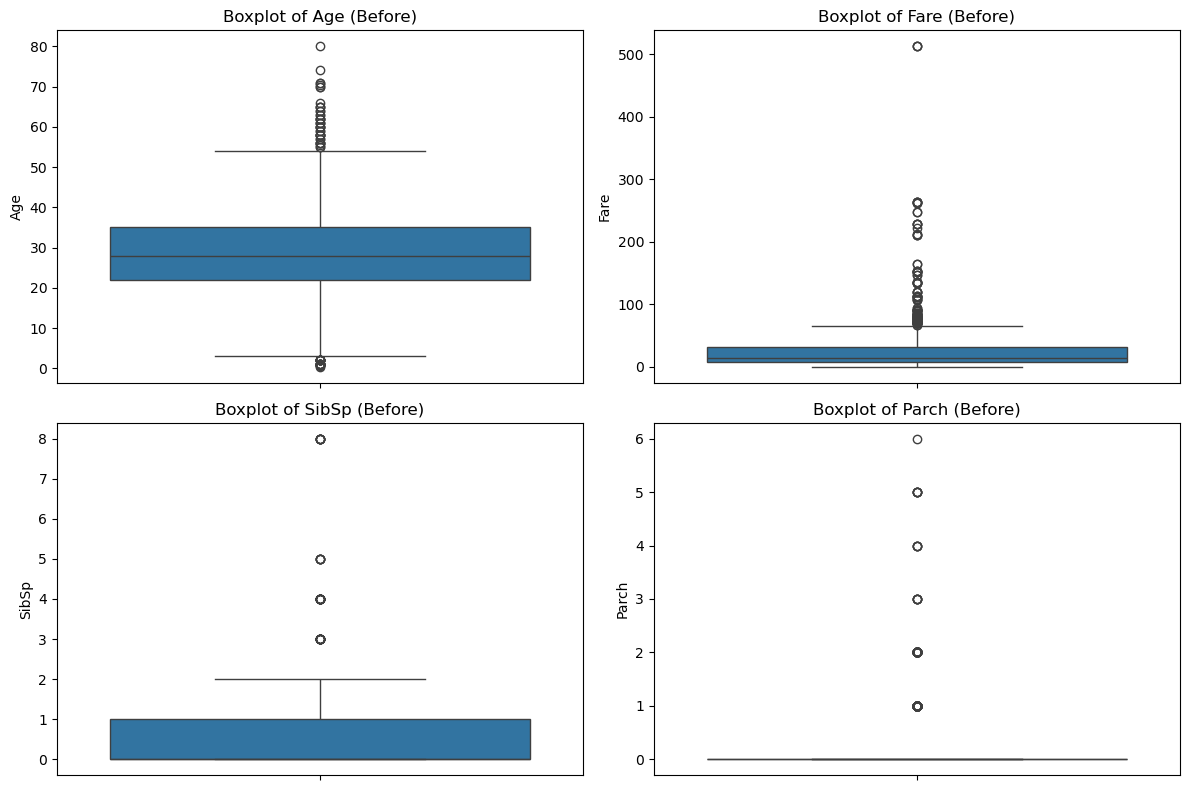

In [35]:

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before)')
plt.tight_layout()
plt.show()

## 4. Handle outliers (Capping using IQR for Age and Fare)

In [ ]:
def detect_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - factor * IQR, 0)  # Age cannot be negative
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col} - Outliers (IQR): {len(outliers)}, Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}')
    return outliers, lower_bound, upper_bound


for col in num_cols:
    detect_outliers_iqr(df, col)

Age - Outliers (IQR): 66, Lower: 2.50, Upper: 54.50
Fare - Outliers (IQR): 116, Lower: -26.72, Upper: 65.63
SibSp - Outliers (IQR): 46, Lower: -1.50, Upper: 2.50
Parch - Outliers (IQR): 213, Lower: 0.00, Upper: 0.00


## 5. Handle outliers (Capping using IQR for Age and Fare)

In [37]:

for col in ['Age', 'Fare']:
    _, lower, upper = detect_outliers_iqr(df, col)
    df[col] = df[col].clip(lower=lower, upper=upper)

# Log transform for Fare
df['Fare_log'] = np.log1p(df['Fare'])

# Check SibSp/Parch outliers
for col in ['SibSp', 'Parch']:
    outliers, _, _ = detect_outliers_iqr(df, col)
    if len(outliers) / len(df) < 0.05:  # Less than 5%, keep as is
        print(f'{col}: Keeping outliers (contextually meaningful)')
    else:
        df[col] = df[col].clip(lower=0, upper=df[col].quantile(0.95))

Age - Outliers (IQR): 66, Lower: 2.50, Upper: 54.50
Fare - Outliers (IQR): 116, Lower: -26.72, Upper: 65.63
SibSp - Outliers (IQR): 46, Lower: -1.50, Upper: 2.50
Parch - Outliers (IQR): 213, Lower: 0.00, Upper: 0.00



## 6. Visualize after processing


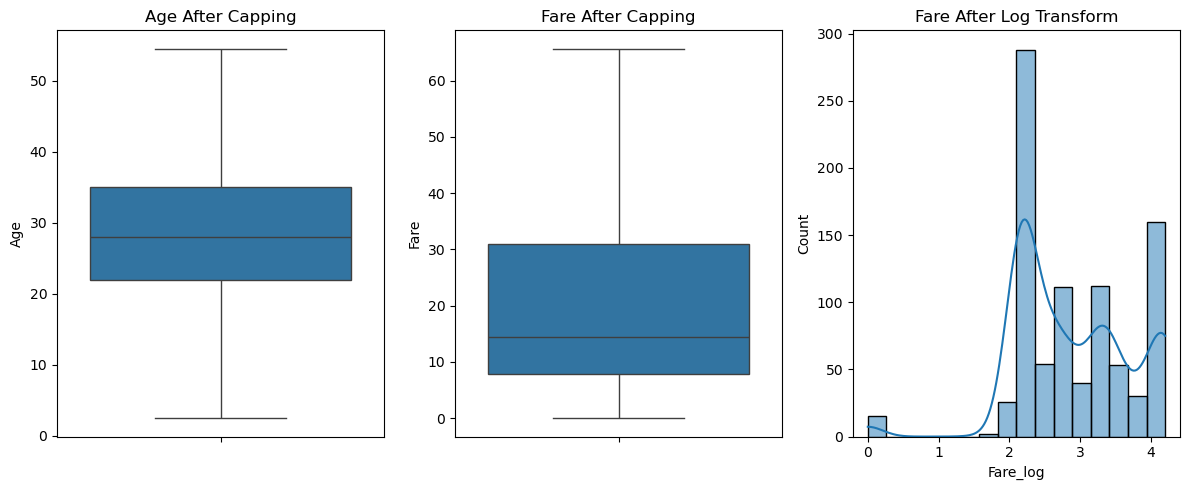

In [38]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Age After Capping')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Fare'])
plt.title('Fare After Capping')
plt.subplot(1, 3, 3)
sns.histplot(df['Fare_log'], kde=True)
plt.title('Fare After Log Transform')
plt.tight_layout()
plt.show()

## 7. Compare describe after processing

In [39]:

print("\nDescribe after processing:")
print(df[['Age', 'Fare', 'SibSp', 'Parch']].describe())


Describe after processing:
              Age        Fare       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000
mean    29.039282   24.046813    0.452301    0.345679
std     12.072074   20.481625    0.788059    0.663266
min      2.500000    0.000000    0.000000    0.000000
25%     22.000000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     35.000000   31.000000    1.000000    0.000000
max     54.500000   65.634400    3.000000    2.000000



## 8. Save cleaned dataset

In [40]:
df.to_csv('train_clean_outliers.csv', index=False)
print("\nCleaned dataset has been saved to 'train_clean_outliers.csv'")


Cleaned dataset has been saved to 'train_clean_outliers.csv'
